# PyCaret 2 Regression Example
This notebook is created using PyCaret 2.0. Last updated : 28-07-2020

In [1]:
# check version
from pycaret.utils import version
version()

pycaret-nightly-0.39


# 1. Loading Dataset

In [2]:
from pycaret.datasets import get_data
data = get_data('insurance')

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

# 2. Initialize Setup

In [3]:
from pycaret.regression import *
reg1 = setup(data, target = 'charges', session_id=123, log_experiment=True, experiment_name='insurance1')

 
Setup Succesfully Completed.


# 3. Compare Baseline

In [4]:
best_model = compare_models(fold=5)

# 4. Create Model

In [5]:
lightgbm = create_model('lightgbm')

In [6]:
lgbm= []

import numpy as np
for i in np.arange(0.1,1,0.1):
    lgbm.append(create_model('lightgbm', verbose=False))

In [7]:
print(len(lgbm))

9


## 4.1 Bring your own Model

In [8]:
from interpret.glassbox import ExplainableBoostingRegressor
ebm = ExplainableBoostingRegressor()
ebm = create_model(ebm)

In [9]:
from interpret import show
ebm_global = ebm.explain_global()
show(ebm_global)

<!-- http://127.0.0.1:7419/2432301788632/ -->

# 5. Tune Hyperparameters

In [10]:
tuned_lightgbm = tune_model(lightgbm, n_iter=50, optimize = 'MAE')

In [11]:
tuned_lightgbm

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.3, max_depth=70,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.2,
              n_estimators=10, n_jobs=-1, num_leaves=10, objective=None,
              random_state=123, reg_alpha=0.4, reg_lambda=0.1, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

# 6. Ensemble Model

In [12]:
dt = create_model('dt')

In [13]:
bagged_dt = ensemble_model(dt, n_estimators=50)

In [14]:
boosted_dt = ensemble_model(dt, method = 'Boosting')

# 7. Blend Models

In [15]:
blender = blend_models()

# 8. Stack Models

In [16]:
stacker = stack_models(estimator_list = compare_models(n_select=5, fold = 5, whitelist = models(type='ensemble').index.tolist()))

# 9. Analyze Model

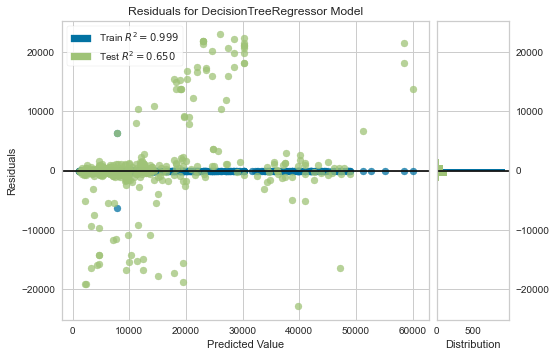

In [17]:
plot_model(dt)

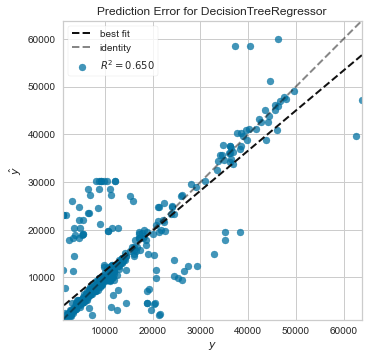

In [18]:
plot_model(dt, plot = 'error')

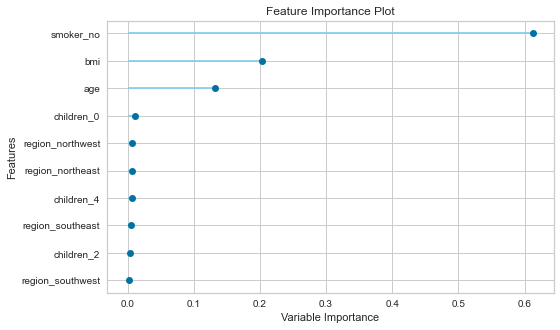

In [19]:
plot_model(dt, plot = 'feature')

In [20]:
evaluate_model(dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# 10. Interpret Model

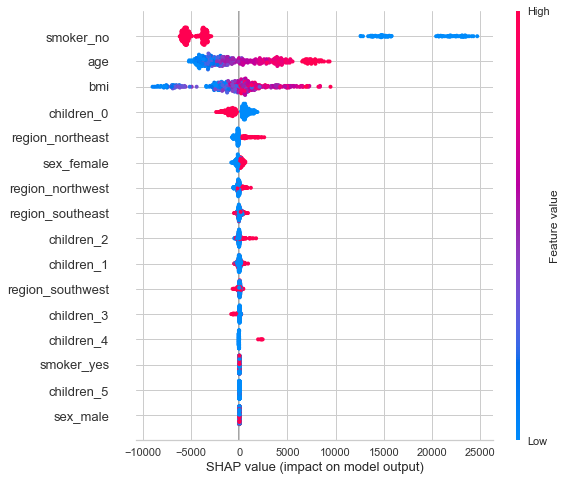

In [21]:
interpret_model(lightgbm)

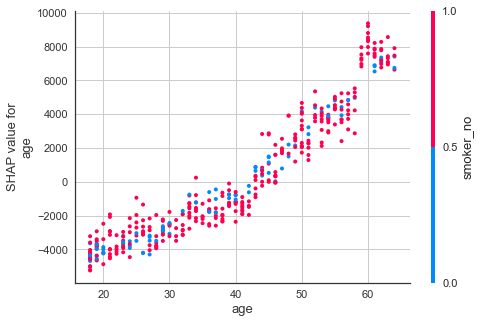

In [22]:
interpret_model(lightgbm, plot = 'correlation')

In [23]:
interpret_model(lightgbm, plot = 'reason', observation = 12)

# 11. AutoML()

In [24]:
best = automl(optimize = 'MAE')
best

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=123,
                                                       splitter='best'),
                

# 12. Predict Model

In [25]:
pred_holdouts = predict_model(lightgbm)
pred_holdouts.head()

Model        MAE           MSE       RMSE  \
0  Light Gradient Boosting Machine  2764.0353  2.068683e+07  4548.2773   

       R2   RMSLE    MAPE  
0  0.8552  0.5223  0.3678

age     bmi  sex_female  sex_male  children_0  children_1  children_2  \
0  49.0  42.680         1.0       0.0         0.0         0.0         1.0   
1  32.0  37.335         0.0       1.0         0.0         1.0         0.0   
2  27.0  31.400         1.0       0.0         1.0         0.0         0.0   
3  35.0  24.130         0.0       1.0         0.0         1.0         0.0   
4  60.0  25.740         0.0       1.0         1.0         0.0         0.0   

   children_3  children_4  children_5  smoker_no  smoker_yes  \
0         0.0         0.0         0.0        1.0         0.0   
1         0.0         0.0         0.0        1.0         0.0   
2         0.0         0.0         0.0        0.0         1.0   
3         0.0         0.0         0.0        1.0         0.0   
4         0.0         0.0         0.0        1.0         0.0   

   region_northeast  region_northwest  region_southeast  region_southwest  \
0               0.0               0.0               1.0               0.0   
1               1.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               1.0   
3               0.0               1.0               0.0               0.0   
4               0.0               0.0               1.0               0.0   

       charges       Label  
0   9800.88820   9363.9665  
1   4667.60765  10393.4936  
2  34838.87300  35628.9933  
3   5125.21570   6926.8267  
4  12142.57860  17508.2783

In [26]:
new_data = data.copy()
new_data.drop(['charges'], axis=1, inplace=True)
predict_new = predict_model(best, data=new_data)
predict_new.head()

age     sex     bmi  children smoker     region       Label
0   19  female  27.900         0    yes  southwest  16884.9240
1   18    male  33.770         1     no  southeast   1725.5523
2   28    male  33.000         3     no  southeast   5138.2567
3   33    male  22.705         0     no  northwest  21984.4706
4   32    male  28.880         0     no  northwest   3866.8552

# 13. Save / Load Model

In [27]:
save_model(best, model_name='best-model')

Transformation Pipeline and Model Succesfully Saved


In [28]:
loaded_bestmodel = load_model('best-model')
print(loaded_bestmodel)

Transformation Pipeline and Model Sucessfully Loaded
[Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      ml_usecase='regression',
                                      numerical_features=[], target='charges',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_Catagorical_Levels...
                ('group', Empty()), ('nonliner', Empty()), ('scaling', Empty()),
                ('P_transform', Empty()), ('pt_target', Empty()),
                ('binn', Empty()), ('rem_outliers', Empty()),
                ('cluster_all', Empty()), ('dummy', Dummify(t

In [29]:
from sklearn import set_config
set_config(display='diagram')
loaded_bestmodel[0]

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      ml_usecase='regression',
                                      numerical_features=[], target='charges',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_Catagorical_Levels...
                ('group', Empty()), ('nonliner', Empty()), ('scaling', Empty()),
                ('P_transform', Empty()), ('pt_target', Empty()),
                ('binn', Empty()), ('rem_outliers', Empty()),
                ('cluster_all', Empty()), ('dummy', Dummify(target='charges')),
                ('fix_perfect', Empty()), ('clean_names', Clean_Colum_Names()),
                ('feature_select', Empty()), ('fix_multi', Empty()),
                ('dfs', Empty()), ('pca', Empty())],
         verbose=False)

In [30]:
from sklearn import set_config
set_config(display='text')

# 14. Deploy Model

In [31]:
deploy_model(best, model_name = 'best-aws', authentication = {'bucket' : 'pycaret-test'})

Model Succesfully Deployed on AWS S3


# 15. Get Config / Set Config

In [32]:
X_train = get_config('X_train')
X_train.head()

age    bmi  sex_female  sex_male  children_0  children_1  children_2  \
300  36.0  27.55         0.0       1.0         0.0         0.0         0.0   
904  60.0  35.10         1.0       0.0         1.0         0.0         0.0   
670  30.0  31.57         0.0       1.0         0.0         0.0         0.0   
617  49.0  25.60         0.0       1.0         0.0         0.0         1.0   
373  26.0  32.90         0.0       1.0         0.0         0.0         1.0   

     children_3  children_4  children_5  smoker_no  smoker_yes  \
300         1.0         0.0         0.0        1.0         0.0   
904         0.0         0.0         0.0        1.0         0.0   
670         1.0         0.0         0.0        1.0         0.0   
617         0.0         0.0         0.0        0.0         1.0   
373         0.0         0.0         0.0        0.0         1.0   

     region_northeast  region_northwest  region_southeast  region_southwest  
300               1.0               0.0               0.0               0.0  
904               0.0               0.0               0.0               1.0  
670               0.0               0.0               1.0               0.0  
617               0.0               0.0               0.0               1.0  
373               0.0               0.0               0.0               1.0

In [33]:
get_config('seed')

123

In [34]:
from pycaret.regression import set_config
set_config('seed', 999)

In [35]:
get_config('seed')

999

# 16. Get System Logs

In [36]:
get_system_logs()

['2020-07-28 21', '03', '39,795', 'INFO', 'PyCaret Classification Module']
['2020-07-28 21', '03', '39,795', 'INFO', 'version pycaret-nightly-0.39']
['2020-07-28 21', '03', '39,796', 'INFO', 'Initializing setup()']
['2020-07-28 21', '03', '39,796', 'INFO', 'USI', '86aa']
['2020-07-28 21', '03', '39,796', 'INFO', 'setup(data=(1070, 19), target=Purchase, train_size=0.7, sampling=True, sample_estimator=None, categorical_features=None, categorical_imputation=constant, ordinal_features=None,']
['high_cardinality_features=None, high_cardinality_method=frequency, numeric_features=None, numeric_imputation=mean, date_features=None, ignore_features=None, normalize=False,']
['normalize_method=zscore, transformation=False, transformation_method=yeo-johnson, handle_unknown_categorical=True, unknown_categorical_method=least_frequent, pca=False, pca_method=linear,']
['pca_components=None, ignore_low_variance=False, combine_rare_levels=False, rare_level_threshold=0.1, bin_numeric_features=None, remove

['2020-07-28 21', '10', '14,950', 'INFO', 'Evaluating Metrics']
['2020-07-28 21', '10', '15,238', 'INFO', 'Compiling Metrics']
['2020-07-28 21', '10', '15,242', 'INFO', 'Initializing Fold 2']
['2020-07-28 21', '10', '15,250', 'INFO', 'Fitting Model']
['2020-07-28 21', '10', '15,543', 'INFO', 'Evaluating Metrics']
['2020-07-28 21', '10', '15,822', 'INFO', 'Compiling Metrics']
['2020-07-28 21', '10', '15,828', 'INFO', 'Initializing Fold 3']
['2020-07-28 21', '10', '15,835', 'INFO', 'Fitting Model']
['2020-07-28 21', '10', '16,145', 'INFO', 'Evaluating Metrics']
['2020-07-28 21', '10', '16,423', 'INFO', 'Compiling Metrics']
['2020-07-28 21', '10', '16,429', 'INFO', 'Initializing Fold 4']
['2020-07-28 21', '10', '16,437', 'INFO', 'Fitting Model']
['2020-07-28 21', '10', '16,730', 'INFO', 'Evaluating Metrics']
['2020-07-28 21', '10', '17,014', 'INFO', 'Compiling Metrics']
['2020-07-28 21', '10', '17,017', 'INFO', 'Initializing Fold 5']
['2020-07-28 21', '10', '17,023', 'INFO', 'Fitting Mode

['2020-07-28 23', '39', '04,901', 'INFO', 'Importing stopwords from nltk']
['2020-07-28 23', '39', '05,250', 'INFO', 'No custom stopwords defined']
['2020-07-28 23', '39', '05,251', 'INFO', 'Removing numeric characters from the text']
['2020-07-28 23', '39', '05,337', 'INFO', 'mlflow==1.8.0']
['2020-07-28 23', '39', '05,337', 'INFO', 'Checking Exceptions']
['2020-07-28 23', '39', '05,615', 'INFO', 'Removing special characters from the text']
['2020-07-28 23', '39', '06,430', 'INFO', 'Tokenizing Words']
['2020-07-28 23', '39', '06,558', 'INFO', 'Preloading libraries']
['2020-07-28 23', '39', '06,740', 'INFO', 'Preparing display monitor']
['2020-07-28 23', '39', '06,754', 'INFO', 'Importing libraries']
['2020-07-28 23', '39', '06,754', 'INFO', 'Declaring global variables']
['2020-07-28 23', '39', '06,754', 'INFO', 'Input provided', 'dataframe']
['2020-07-28 23', '39', '06,755', 'INFO', 'session_id set to', '8313']
['2020-07-28 23', '39', '06,755', 'INFO', 'Copying training dataset']
['20

['2020-07-29 00', '00', '41,199', 'INFO', 'Removing stopwords after lemmatizing']
['2020-07-29 00', '00', '41,691', 'INFO', 'pyLDAvis==2.1.2']
['2020-07-29 00', '00', '41,790', 'INFO', 'wordcloud==1.7.0']
['2020-07-29 00', '00', '41,813', 'INFO', 'wordcloud==1.7.0']
['2020-07-29 00', '00', '42,425', 'INFO', 'mlflow==1.8.0']
['2020-07-29 00', '00', '42,426', 'INFO', 'Checking Exceptions']
['2020-07-29 00', '00', '42,454', 'INFO', 'mlflow==1.8.0']
['2020-07-29 00', '00', '42,454', 'INFO', 'Checking Exceptions']
['2020-07-29 00', '00', '43,149', 'INFO', 'Creating corpus and dictionary']
['2020-07-29 00', '00', '43,550', 'INFO', 'Preloading libraries']
['2020-07-29 00', '00', '43,631', 'INFO', 'Preloading libraries']
['2020-07-29 00', '00', '43,673', 'INFO', 'PyCaret NLP Module']
['2020-07-29 00', '00', '43,673', 'INFO', 'version pycaret-nightly-0.39']
['2020-07-29 00', '00', '43,673', 'INFO', 'Initializing setup()']
['2020-07-29 00', '00', '43,673', 'INFO', 'USI', 'ff81']
['2020-07-29 00'

['2020-07-29 00', '20', '05,748', 'INFO', 'Defining num_topics parameter']
['2020-07-29 00', '20', '05,748', 'INFO', 'num_topics set to', '4']
['2020-07-29 00', '20', '05,749', 'INFO', 'LDA multi_core enabled']
['2020-07-29 00', '20', '05,749', 'INFO', 'LdaMulticore imported successfully']
['2020-07-29 00', '20', '06,404', 'INFO', 'Compiling processed text']
['2020-07-29 00', '20', '06,429', 'INFO', 'Compiling information grid']
['2020-07-29 00', '20', '06,758', 'INFO', 'Creating corpus and dictionary']
['2020-07-29 00', '20', '06,974', 'INFO', 'Creating MLFlow logs']
['2020-07-29 00', '20', '07,458', 'INFO', 'setup() succesfully completed......................................']
['2020-07-29 00', '20', '07,458', 'INFO', 'Initializing create_model()']
['2020-07-29 00', '20', '07,458', 'INFO', 'create_model(model=lda, multi_core=True, num_topics=None, verbose=True, system=True)']
['2020-07-29 00', '20', '07,458', 'INFO', 'Checking exceptions']
['2020-07-29 00', '20', '07,459', 'INFO', 'P

['2020-07-29 00', '37', '49,867', 'INFO', 'USI', '230a']
['2020-07-29 00', '37', '49,867', 'INFO', 'setup(data=(6818, 7), target=en, custom_stopwords=None, html=False, session_id=None, log_experiment=True,']
['experiment_name=kiva_exp, log_plots=False, log_data=False, verbose=True)']
['2020-07-29 00', '37', '49,867', 'INFO', 'Checking environment']
['2020-07-29 00', '37', '49,867', 'INFO', 'python_version', '3.6.10']
['2020-07-29 00', '37', '49,867', 'INFO', 'python_build', "('default', 'May  7 2020 19", '46', "08')"]
['2020-07-29 00', '37', '49,867', 'INFO', 'machine', 'AMD64']
['2020-07-29 00', '37', '49,868', 'INFO', 'platform', 'Windows-10-10.0.18362-SP0']
['2020-07-29 00', '37', '49,905', 'INFO', 'Memory', 'svmem(total=17032478720, available=9596788736, percent=43.7, used=7435689984, free=9596788736)']
['2020-07-29 00', '37', '49,905', 'INFO', 'Physical Core', '4']
['2020-07-29 00', '37', '49,905', 'INFO', 'Logical Core', '8']
['2020-07-29 00', '37', '49,905', 'INFO', 'Checking li

['2020-07-29 00', '55', '21,913', 'INFO', 'spacy==2.2.4']
['2020-07-29 00', '55', '22,045', 'INFO', 'Removing special characters from the text']
['2020-07-29 00', '55', '22,093', 'INFO', 'Removing special characters from the text']
['2020-07-29 00', '55', '22,583', 'INFO', 'nltk==3.5']
['2020-07-29 00', '55', '22,628', 'INFO', 'textblob==0.15.3']
['2020-07-29 00', '55', '23,207', 'INFO', 'pyLDAvis==2.1.2']
['2020-07-29 00', '55', '23,301', 'INFO', 'wordcloud==1.7.0']
['2020-07-29 00', '55', '23,901', 'INFO', 'mlflow==1.8.0']
['2020-07-29 00', '55', '23,902', 'INFO', 'Checking Exceptions']
['2020-07-29 00', '55', '24,819', 'INFO', 'Tokenizing Words']
['2020-07-29 00', '55', '24,922', 'INFO', 'Tokenizing Words']
['2020-07-29 00', '55', '25,147', 'INFO', 'Extracting Bigrams']
['2020-07-29 00', '55', '25,334', 'INFO', 'Preloading libraries']
['2020-07-29 00', '55', '25,518', 'INFO', 'Preparing display monitor']
['2020-07-29 00', '55', '25,529', 'INFO', 'Importing libraries']
['2020-07-29 0

['2020-07-29 01', '12', '51,036', 'INFO', 'Importing stopwords from nltk']
['2020-07-29 01', '12', '51,384', 'INFO', 'No custom stopwords defined']
['2020-07-29 01', '12', '51,384', 'INFO', 'Removing numeric characters from the text']
['2020-07-29 01', '12', '51,407', 'INFO', 'Tokenizing Words']
['2020-07-29 01', '12', '51,654', 'INFO', 'Removing special characters from the text']
['2020-07-29 01', '12', '54,206', 'INFO', 'Extracting Bigrams']
['2020-07-29 01', '12', '54,527', 'INFO', 'Tokenizing Words']
['2020-07-29 01', '12', '55,694', 'INFO', 'Removing stopwords']
['2020-07-29 01', '12', '57,492', 'INFO', 'Removing stopwords']
['2020-07-29 01', '12', '59,379', 'INFO', 'Extracting Bigrams']
['2020-07-29 01', '13', '01,237', 'INFO', 'Removing stopwords']
['2020-07-29 01', '13', '01,440', 'INFO', 'Extracting Bigrams']
['2020-07-29 01', '13', '04,660', 'INFO', 'Extracting Trigrams']
['2020-07-29 01', '13', '05,590', 'INFO', 'Extracting Bigrams']
['2020-07-29 01', '13', '10,301', 'INFO',

['2020-07-29 01', '30', '04,974', 'INFO', 'LDA multi_core enabled']
['2020-07-29 01', '30', '04,974', 'INFO', 'LdaMulticore imported successfully']
['2020-07-29 01', '30', '05,145', 'INFO', 'spacy==2.2.4']
['2020-07-29 01', '30', '05,976', 'INFO', 'nltk==3.5']
['2020-07-29 01', '30', '06,050', 'INFO', 'textblob==0.15.3']
['2020-07-29 01', '30', '06,858', 'INFO', 'pyLDAvis==2.1.2']
['2020-07-29 01', '30', '06,997', 'INFO', 'wordcloud==1.7.0']
['2020-07-29 01', '30', '07,841', 'INFO', 'mlflow==1.8.0']
['2020-07-29 01', '30', '07,842', 'INFO', 'Checking Exceptions']
['2020-07-29 01', '30', '09,368', 'INFO', 'Preloading libraries']
['2020-07-29 01', '30', '09,628', 'INFO', 'Preparing display monitor']
['2020-07-29 01', '30', '09,639', 'INFO', 'Importing libraries']
['2020-07-29 01', '30', '09,639', 'INFO', 'Declaring global variables']
['2020-07-29 01', '30', '09,640', 'INFO', 'Input provided', 'dataframe']
['2020-07-29 01', '30', '09,640', 'INFO', 'session_id set to', '2466']
['2020-07-29

['2020-07-29 01', '45', '54,976', 'INFO', 'Tokenizing Words']
['2020-07-29 01', '45', '55,506', 'INFO', 'Extracting Bigrams']
['2020-07-29 01', '45', '55,978', 'INFO', 'Extracting Trigrams']
['2020-07-29 01', '46', '00,104', 'INFO', 'Removing stopwords']
['2020-07-29 01', '46', '01,683', 'INFO', 'Removing stopwords']
['2020-07-29 01', '46', '04,242', 'INFO', 'Extracting Bigrams']
['2020-07-29 01', '46', '05,427', 'INFO', 'Extracting Bigrams']
['2020-07-29 01', '46', '06,473', 'INFO', 'Extracting Trigrams']
['2020-07-29 01', '46', '15,128', 'INFO', 'Extracting Trigrams']
['2020-07-29 01', '46', '15,836', 'INFO', 'Lemmatizing tokens']
['2020-07-29 01', '46', '16,132', 'INFO', 'Extracting Trigrams']
['2020-07-29 01', '46', '27,173', 'INFO', 'Lemmatizing tokens']
['2020-07-29 01', '46', '34,707', 'INFO', 'Lemmatizing tokens']
['2020-07-29 01', '46', '36,117', 'INFO', 'Lemmatizing tokens']
['2020-07-29 01', '47', '26,467', 'INFO', 'Removing stopwords after lemmatizing']
['2020-07-29 01', '4

['2020-07-29 02', '05', '09,800', 'INFO', 'pyLDAvis==2.1.2']
['2020-07-29 02', '05', '09,902', 'INFO', 'wordcloud==1.7.0']
['2020-07-29 02', '05', '10,606', 'INFO', 'mlflow==1.8.0']
['2020-07-29 02', '05', '10,607', 'INFO', 'Checking Exceptions']
['2020-07-29 02', '05', '10,967', 'INFO', 'Compiling processed text']
['2020-07-29 02', '05', '10,986', 'INFO', 'Compiling information grid']
['2020-07-29 02', '05', '11,473', 'INFO', 'Creating MLFlow logs']
['2020-07-29 02', '05', '11,973', 'INFO', 'Preloading libraries']
['2020-07-29 02', '05', '11,983', 'INFO', 'setup() succesfully completed......................................']
['2020-07-29 02', '05', '11,984', 'INFO', 'Initializing create_model()']
['2020-07-29 02', '05', '11,984', 'INFO', 'create_model(model=lda, multi_core=True, num_topics=None, verbose=True, system=True)']
['2020-07-29 02', '05', '11,984', 'INFO', 'Checking exceptions']
['2020-07-29 02', '05', '11,984', 'INFO', 'Preloading libraries']
['2020-07-29 02', '05', '11,984'

['2020-07-29 02', '22', '55,845', 'INFO', 'textblob==0.15.3']
['2020-07-29 02', '22', '55,872', 'INFO', 'Preloading libraries']
['2020-07-29 02', '22', '56,075', 'INFO', 'Preparing display monitor']
['2020-07-29 02', '22', '56,093', 'INFO', 'Importing libraries']
['2020-07-29 02', '22', '56,093', 'INFO', 'Declaring global variables']
['2020-07-29 02', '22', '56,093', 'INFO', 'Input provided', 'dataframe']
['2020-07-29 02', '22', '56,094', 'INFO', 'session_id set to', '439']
['2020-07-29 02', '22', '56,094', 'INFO', 'Copying training dataset']
['2020-07-29 02', '22', '56,095', 'INFO', 'Importing stopwords from nltk']
['2020-07-29 02', '22', '56,403', 'INFO', 'pyLDAvis==2.1.2']
['2020-07-29 02', '22', '56,467', 'INFO', 'No custom stopwords defined']
['2020-07-29 02', '22', '56,468', 'INFO', 'Removing numeric characters from the text']
['2020-07-29 02', '22', '56,507', 'INFO', 'wordcloud==1.7.0']
['2020-07-29 02', '22', '56,716', 'INFO', 'Preloading libraries']
['2020-07-29 02', '22', '56

['2020-07-29 02', '40', '25,088', 'INFO', 'Importing libraries']
['2020-07-29 02', '40', '25,088', 'INFO', 'Declaring global variables']
['2020-07-29 02', '40', '25,088', 'INFO', 'Input provided', 'dataframe']
['2020-07-29 02', '40', '25,088', 'INFO', 'session_id set to', '7518']
['2020-07-29 02', '40', '25,088', 'INFO', 'Copying training dataset']
['2020-07-29 02', '40', '25,089', 'INFO', 'Importing stopwords from nltk']
['2020-07-29 02', '40', '25,461', 'INFO', 'No custom stopwords defined']
['2020-07-29 02', '40', '25,461', 'INFO', 'Removing numeric characters from the text']
['2020-07-29 02', '40', '25,775', 'INFO', 'gensim==3.8.3']
['2020-07-29 02', '40', '25,846', 'INFO', 'Removing special characters from the text']
['2020-07-29 02', '40', '26,361', 'INFO', 'spacy==2.2.4']
['2020-07-29 02', '40', '27,104', 'INFO', 'nltk==3.5']
['2020-07-29 02', '40', '27,163', 'INFO', 'textblob==0.15.3']
['2020-07-29 02', '40', '27,767', 'INFO', 'pyLDAvis==2.1.2']
['2020-07-29 02', '40', '27,865'

['2020-07-29 02', '58', '02,670', 'INFO', 'Preparing display monitor']
['2020-07-29 02', '58', '02,686', 'INFO', 'Importing libraries']
['2020-07-29 02', '58', '02,686', 'INFO', 'Declaring global variables']
['2020-07-29 02', '58', '02,686', 'INFO', 'Input provided', 'dataframe']
['2020-07-29 02', '58', '02,686', 'INFO', 'session_id set to', '6711']
['2020-07-29 02', '58', '02,686', 'INFO', 'Copying training dataset']
['2020-07-29 02', '58', '02,686', 'INFO', 'Importing stopwords from nltk']
['2020-07-29 02', '58', '02,997', 'INFO', 'Extracting Bigrams']
['2020-07-29 02', '58', '03,066', 'INFO', 'No custom stopwords defined']
['2020-07-29 02', '58', '03,066', 'INFO', 'Removing numeric characters from the text']
['2020-07-29 02', '58', '03,333', 'INFO', 'Removing special characters from the text']
['2020-07-29 02', '58', '04,836', 'INFO', 'Extracting Bigrams']
['2020-07-29 02', '58', '06,045', 'INFO', 'Tokenizing Words']
['2020-07-29 02', '58', '07,135', 'INFO', 'Extracting Trigrams']
[

['2020-07-29 03', '17', '02,137', 'INFO', 'Removing stopwords after lemmatizing']
['2020-07-29 03', '17', '04,313', 'INFO', 'Creating corpus and dictionary']
['2020-07-29 03', '17', '05,323', 'INFO', 'Removing stopwords after lemmatizing']
['2020-07-29 03', '17', '06,252', 'INFO', 'Compiling processed text']
['2020-07-29 03', '17', '06,270', 'INFO', 'Compiling information grid']
['2020-07-29 03', '17', '06,778', 'INFO', 'Creating MLFlow logs']
['2020-07-29 03', '17', '07,307', 'INFO', 'setup() succesfully completed......................................']
['2020-07-29 03', '17', '07,307', 'INFO', 'Initializing create_model()']
['2020-07-29 03', '17', '07,307', 'INFO', 'create_model(model=lda, multi_core=True, num_topics=None, verbose=True, system=True)']
['2020-07-29 03', '17', '07,307', 'INFO', 'Checking exceptions']
['2020-07-29 03', '17', '07,307', 'INFO', 'Preloading libraries']
['2020-07-29 03', '17', '07,307', 'INFO', 'Preparing display monitor']
['2020-07-29 03', '17', '07,319', 

['2020-07-29 03', '34', '42,718', 'INFO', 'Preloading libraries']
['2020-07-29 03', '34', '42,718', 'INFO', 'Preparing display monitor']
['2020-07-29 03', '34', '42,728', 'INFO', 'Defining topic model']
['2020-07-29 03', '34', '42,728', 'INFO', 'Model', 'Latent Dirichlet Allocation']
['2020-07-29 03', '34', '42,728', 'INFO', 'Defining num_topics parameter']
['2020-07-29 03', '34', '42,728', 'INFO', 'num_topics set to', '4']
['2020-07-29 03', '34', '42,729', 'INFO', 'LDA multi_core enabled']
['2020-07-29 03', '34', '42,729', 'INFO', 'LdaMulticore imported successfully']
['2020-07-29 03', '34', '42,931', 'INFO', 'PyCaret NLP Module']
['2020-07-29 03', '34', '42,931', 'INFO', 'version pycaret-nightly-0.39']
['2020-07-29 03', '34', '42,931', 'INFO', 'Initializing setup()']
['2020-07-29 03', '34', '42,931', 'INFO', 'USI', '4d9d']
['2020-07-29 03', '34', '42,931', 'INFO', 'setup(data=(6818, 7), target=en, custom_stopwords=None, html=False, session_id=None, log_experiment=True,']
['experiment

['2020-07-29 03', '52', '21,271', 'INFO', 'gensim==3.8.3']
['2020-07-29 03', '52', '21,341', 'INFO', 'pyLDAvis==2.1.2']
['2020-07-29 03', '52', '21,447', 'INFO', 'wordcloud==1.7.0']
['2020-07-29 03', '52', '21,868', 'INFO', 'pyLDAvis==2.1.2']
['2020-07-29 03', '52', '21,885', 'INFO', 'spacy==2.2.4']
['2020-07-29 03', '52', '21,988', 'INFO', 'wordcloud==1.7.0']
['2020-07-29 03', '52', '22,182', 'INFO', 'mlflow==1.8.0']
['2020-07-29 03', '52', '22,183', 'INFO', 'Checking Exceptions']
['2020-07-29 03', '52', '22,663', 'INFO', 'mlflow==1.8.0']
['2020-07-29 03', '52', '22,663', 'INFO', 'Checking Exceptions']
['2020-07-29 03', '52', '22,690', 'INFO', 'nltk==3.5']
['2020-07-29 03', '52', '22,734', 'INFO', 'textblob==0.15.3']
['2020-07-29 03', '52', '23,332', 'INFO', 'pyLDAvis==2.1.2']
['2020-07-29 03', '52', '23,430', 'INFO', 'wordcloud==1.7.0']
['2020-07-29 03', '52', '23,492', 'INFO', 'Preloading libraries']
['2020-07-29 03', '52', '23,692', 'INFO', 'Preparing display monitor']
['2020-07-29

['2020-07-29 04', '09', '54,082', 'INFO', 'LDA multi_core enabled']
['2020-07-29 04', '09', '54,082', 'INFO', 'LdaMulticore imported successfully']
['2020-07-29 04', '09', '54,318', 'INFO', 'No custom stopwords defined']
['2020-07-29 04', '09', '54,318', 'INFO', 'Removing numeric characters from the text']
['2020-07-29 04', '09', '54,610', 'INFO', 'Removing special characters from the text']
['2020-07-29 04', '09', '57,363', 'INFO', 'Tokenizing Words']
['2020-07-29 04', '09', '58,627', 'INFO', 'Removing stopwords']
['2020-07-29 04', '09', '58,879', 'INFO', 'PyCaret NLP Module']
['2020-07-29 04', '09', '58,879', 'INFO', 'version pycaret-nightly-0.39']
['2020-07-29 04', '09', '58,879', 'INFO', 'Initializing setup()']
['2020-07-29 04', '09', '58,879', 'INFO', 'USI', '82f6']
['2020-07-29 04', '09', '58,880', 'INFO', 'setup(data=(6818, 7), target=en, custom_stopwords=None, html=False, session_id=None, log_experiment=True,']
['experiment_name=kiva_exp, log_plots=False, log_data=False, verbos

['2020-07-29 04', '27', '18,334', 'INFO', 'Preparing display monitor']
['2020-07-29 04', '27', '18,343', 'INFO', 'Defining topic model']
['2020-07-29 04', '27', '18,343', 'INFO', 'Model', 'Latent Dirichlet Allocation']
['2020-07-29 04', '27', '18,343', 'INFO', 'Defining num_topics parameter']
['2020-07-29 04', '27', '18,343', 'INFO', 'num_topics set to', '4']
['2020-07-29 04', '27', '18,343', 'INFO', 'LDA multi_core enabled']
['2020-07-29 04', '27', '18,344', 'INFO', 'LdaMulticore imported successfully']
['2020-07-29 04', '27', '18,377', 'INFO', 'No custom stopwords defined']
['2020-07-29 04', '27', '18,377', 'INFO', 'Removing numeric characters from the text']
['2020-07-29 04', '27', '18,756', 'INFO', 'Removing special characters from the text']
['2020-07-29 04', '27', '18,774', 'INFO', 'PyCaret NLP Module']
['2020-07-29 04', '27', '18,774', 'INFO', 'version pycaret-nightly-0.39']
['2020-07-29 04', '27', '18,774', 'INFO', 'Initializing setup()']
['2020-07-29 04', '27', '18,774', 'INFO

['2020-07-29 04', '44', '44,062', 'INFO', 'nltk==3.5']
['2020-07-29 04', '44', '44,103', 'INFO', 'textblob==0.15.3']
['2020-07-29 04', '44', '44,105', 'INFO', 'textblob==0.15.3']
['2020-07-29 04', '44', '44,127', 'INFO', 'textblob==0.15.3']
['2020-07-29 04', '44', '44,719', 'INFO', 'pyLDAvis==2.1.2']
['2020-07-29 04', '44', '44,719', 'INFO', 'pyLDAvis==2.1.2']
['2020-07-29 04', '44', '44,721', 'INFO', 'pyLDAvis==2.1.2']
['2020-07-29 04', '44', '44,824', 'INFO', 'wordcloud==1.7.0']
['2020-07-29 04', '44', '44,826', 'INFO', 'wordcloud==1.7.0']
['2020-07-29 04', '44', '44,832', 'INFO', 'wordcloud==1.7.0']
['2020-07-29 04', '44', '45,469', 'INFO', 'Removing stopwords']
['2020-07-29 04', '44', '45,474', 'INFO', 'mlflow==1.8.0']
['2020-07-29 04', '44', '45,475', 'INFO', 'Checking Exceptions']
['2020-07-29 04', '44', '45,482', 'INFO', 'mlflow==1.8.0']
['2020-07-29 04', '44', '45,483', 'INFO', 'Checking Exceptions']
['2020-07-29 04', '44', '45,490', 'INFO', 'mlflow==1.8.0']
['2020-07-29 04', '

['2020-07-29 05', '03', '57,990', 'INFO', 'setup() succesfully completed......................................']
['2020-07-29 05', '03', '57,990', 'INFO', 'Initializing create_model()']
['2020-07-29 05', '03', '57,990', 'INFO', 'create_model(model=lda, multi_core=True, num_topics=None, verbose=True, system=True)']
['2020-07-29 05', '03', '57,991', 'INFO', 'Checking exceptions']
['2020-07-29 05', '03', '57,991', 'INFO', 'Preloading libraries']
['2020-07-29 05', '03', '57,991', 'INFO', 'Preparing display monitor']
['2020-07-29 05', '03', '57,999', 'INFO', 'Defining topic model']
['2020-07-29 05', '03', '57,999', 'INFO', 'Model', 'Latent Dirichlet Allocation']
['2020-07-29 05', '03', '57,999', 'INFO', 'Defining num_topics parameter']
['2020-07-29 05', '03', '57,999', 'INFO', 'num_topics set to', '4']
['2020-07-29 05', '03', '58,000', 'INFO', 'LDA multi_core enabled']
['2020-07-29 05', '03', '58,000', 'INFO', 'LdaMulticore imported successfully']
['2020-07-29 05', '04', '02,562', 'INFO', '

['2020-07-29 05', '21', '32,899', 'INFO', 'Checking libraries']
['2020-07-29 05', '21', '32,899', 'INFO', 'pd==1.0.4']
['2020-07-29 05', '21', '32,900', 'INFO', 'numpy==1.18.5']
['2020-07-29 05', '21', '33,515', 'INFO', 'gensim==3.8.3']
['2020-07-29 05', '21', '34,127', 'INFO', 'spacy==2.2.4']
['2020-07-29 05', '21', '34,207', 'INFO', 'gensim==3.8.3']
['2020-07-29 05', '21', '34,828', 'INFO', 'Removing stopwords after lemmatizing']
['2020-07-29 05', '21', '34,842', 'INFO', 'spacy==2.2.4']
['2020-07-29 05', '21', '34,921', 'INFO', 'nltk==3.5']
['2020-07-29 05', '21', '34,983', 'INFO', 'textblob==0.15.3']
['2020-07-29 05', '21', '35,598', 'INFO', 'pyLDAvis==2.1.2']
['2020-07-29 05', '21', '35,599', 'INFO', 'nltk==3.5']
['2020-07-29 05', '21', '35,660', 'INFO', 'textblob==0.15.3']
['2020-07-29 05', '21', '35,709', 'INFO', 'wordcloud==1.7.0']
['2020-07-29 05', '21', '36,264', 'INFO', 'pyLDAvis==2.1.2']
['2020-07-29 05', '21', '36,382', 'INFO', 'mlflow==1.8.0']
['2020-07-29 05', '21', '36,3

['2020-07-29 05', '39', '26,642', 'INFO', 'Preloading libraries']
['2020-07-29 05', '39', '26,869', 'INFO', 'Preparing display monitor']
['2020-07-29 05', '39', '26,886', 'INFO', 'Importing libraries']
['2020-07-29 05', '39', '26,886', 'INFO', 'Declaring global variables']
['2020-07-29 05', '39', '26,887', 'INFO', 'Input provided', 'dataframe']
['2020-07-29 05', '39', '26,887', 'INFO', 'session_id set to', '2479']
['2020-07-29 05', '39', '26,887', 'INFO', 'Copying training dataset']
['2020-07-29 05', '39', '26,888', 'INFO', 'Importing stopwords from nltk']
['2020-07-29 05', '39', '27,235', 'INFO', 'No custom stopwords defined']
['2020-07-29 05', '39', '27,235', 'INFO', 'Removing numeric characters from the text']
['2020-07-29 05', '39', '27,244', 'INFO', 'mlflow==1.8.0']
['2020-07-29 05', '39', '27,245', 'INFO', 'Checking Exceptions']
['2020-07-29 05', '39', '27,591', 'INFO', 'Removing special characters from the text']
['2020-07-29 05', '39', '28,533', 'INFO', 'Preloading libraries']


['2020-07-29 05', '56', '59,859', 'INFO', 'pyLDAvis==2.1.2']
['2020-07-29 05', '56', '59,948', 'INFO', 'wordcloud==1.7.0']
['2020-07-29 05', '57', '00,522', 'INFO', 'Preloading libraries']
['2020-07-29 05', '57', '00,609', 'INFO', 'mlflow==1.8.0']
['2020-07-29 05', '57', '00,609', 'INFO', 'Checking Exceptions']
['2020-07-29 05', '57', '00,718', 'INFO', 'Preparing display monitor']
['2020-07-29 05', '57', '00,726', 'INFO', 'Importing libraries']
['2020-07-29 05', '57', '00,726', 'INFO', 'Declaring global variables']
['2020-07-29 05', '57', '00,726', 'INFO', 'Input provided', 'dataframe']
['2020-07-29 05', '57', '00,726', 'INFO', 'session_id set to', '3073']
['2020-07-29 05', '57', '00,726', 'INFO', 'Copying training dataset']
['2020-07-29 05', '57', '00,727', 'INFO', 'Importing stopwords from nltk']
['2020-07-29 05', '57', '00,995', 'INFO', 'No custom stopwords defined']
['2020-07-29 05', '57', '00,995', 'INFO', 'Removing numeric characters from the text']
['2020-07-29 05', '57', '01,32

['2020-07-29 06', '16', '18,135', 'INFO', 'LdaMulticore imported successfully']
['2020-07-29 06', '16', '18,593', 'INFO', 'PyCaret NLP Module']
['2020-07-29 06', '16', '18,594', 'INFO', 'version pycaret-nightly-0.39']
['2020-07-29 06', '16', '18,594', 'INFO', 'Initializing setup()']
['2020-07-29 06', '16', '18,594', 'INFO', 'USI', 'a0fb']
['2020-07-29 06', '16', '18,594', 'INFO', 'setup(data=(6818, 7), target=en, custom_stopwords=None, html=False, session_id=None, log_experiment=True,']
['experiment_name=kiva_exp, log_plots=False, log_data=False, verbose=True)']
['2020-07-29 06', '16', '18,594', 'INFO', 'Checking environment']
['2020-07-29 06', '16', '18,594', 'INFO', 'python_version', '3.6.10']
['2020-07-29 06', '16', '18,594', 'INFO', 'python_build', "('default', 'May  7 2020 19", '46', "08')"]
['2020-07-29 06', '16', '18,595', 'INFO', 'machine', 'AMD64']
['2020-07-29 06', '16', '18,595', 'INFO', 'platform', 'Windows-10-10.0.18362-SP0']
['2020-07-29 06', '16', '18,640', 'INFO', 'Memo

['2020-07-29 06', '36', '00,082', 'INFO', 'Checking Exceptions']
['2020-07-29 06', '36', '00,107', 'INFO', 'spacy==2.2.4']
['2020-07-29 06', '36', '00,486', 'INFO', 'Tokenizing Words']
['2020-07-29 06', '36', '00,810', 'INFO', 'nltk==3.5']
['2020-07-29 06', '36', '00,872', 'INFO', 'textblob==0.15.3']
['2020-07-29 06', '36', '01,379', 'INFO', 'Preloading libraries']
['2020-07-29 06', '36', '01,432', 'INFO', 'pyLDAvis==2.1.2']
['2020-07-29 06', '36', '01,451', 'INFO', 'Creating corpus and dictionary']
['2020-07-29 06', '36', '01,540', 'INFO', 'wordcloud==1.7.0']
['2020-07-29 06', '36', '01,579', 'INFO', 'Preparing display monitor']
['2020-07-29 06', '36', '01,589', 'INFO', 'Importing libraries']
['2020-07-29 06', '36', '01,590', 'INFO', 'Declaring global variables']
['2020-07-29 06', '36', '01,590', 'INFO', 'Input provided', 'dataframe']
['2020-07-29 06', '36', '01,590', 'INFO', 'session_id set to', '8892']
['2020-07-29 06', '36', '01,590', 'INFO', 'Copying training dataset']
['2020-07-2

['2020-07-29 06', '51', '18,051', 'INFO', 'machine', 'AMD64']
['2020-07-29 06', '51', '18,051', 'INFO', 'platform', 'Windows-10-10.0.18362-SP0']
['2020-07-29 06', '51', '18,084', 'INFO', 'Memory', 'svmem(total=17032478720, available=9476911104, percent=44.4, used=7555567616, free=9476911104)']
['2020-07-29 06', '51', '18,084', 'INFO', 'Physical Core', '4']
['2020-07-29 06', '51', '18,084', 'INFO', 'Logical Core', '8']
['2020-07-29 06', '51', '18,084', 'INFO', 'Checking libraries']
['2020-07-29 06', '51', '18,084', 'INFO', 'pd==1.0.4']
['2020-07-29 06', '51', '18,084', 'INFO', 'numpy==1.18.5']
['2020-07-29 06', '51', '18,449', 'INFO', 'pyLDAvis==2.1.2']
['2020-07-29 06', '51', '18,565', 'INFO', 'wordcloud==1.7.0']
['2020-07-29 06', '51', '19,241', 'INFO', 'mlflow==1.8.0']
['2020-07-29 06', '51', '19,241', 'INFO', 'Checking Exceptions']
['2020-07-29 06', '51', '19,385', 'INFO', 'gensim==3.8.3']
['2020-07-29 06', '51', '19,997', 'INFO', 'spacy==2.2.4']
['2020-07-29 06', '51', '20,592', 'I

['2020-07-29 07', '08', '40,119', 'INFO', 'Model', 'Latent Dirichlet Allocation']
['2020-07-29 07', '08', '40,119', 'INFO', 'Defining num_topics parameter']
['2020-07-29 07', '08', '40,120', 'INFO', 'num_topics set to', '4']
['2020-07-29 07', '08', '40,120', 'INFO', 'LDA multi_core enabled']
['2020-07-29 07', '08', '40,121', 'INFO', 'LdaMulticore imported successfully']
['2020-07-29 07', '08', '42,829', 'INFO', 'Tokenizing Words']
['2020-07-29 07', '08', '44,760', 'INFO', 'PyCaret NLP Module']
['2020-07-29 07', '08', '44,760', 'INFO', 'version pycaret-nightly-0.39']
['2020-07-29 07', '08', '44,760', 'INFO', 'Initializing setup()']
['2020-07-29 07', '08', '44,761', 'INFO', 'USI', '85fd']
['2020-07-29 07', '08', '44,761', 'INFO', 'setup(data=(6818, 7), target=en, custom_stopwords=None, html=False, session_id=None, log_experiment=True,']
['experiment_name=kiva_exp, log_plots=False, log_data=False, verbose=True)']
['2020-07-29 07', '08', '44,761', 'INFO', 'Checking environment']
['2020-07-

['2020-07-29 07', '28', '00,313', 'INFO', 'Creating corpus and dictionary']
['2020-07-29 07', '28', '00,831', 'INFO', 'setup() succesfully completed......................................']
['2020-07-29 07', '28', '00,831', 'INFO', 'Initializing create_model()']
['2020-07-29 07', '28', '00,831', 'INFO', 'create_model(model=lda, multi_core=True, num_topics=None, verbose=True, system=True)']
['2020-07-29 07', '28', '00,831', 'INFO', 'Checking exceptions']
['2020-07-29 07', '28', '00,831', 'INFO', 'Preloading libraries']
['2020-07-29 07', '28', '00,831', 'INFO', 'Preparing display monitor']
['2020-07-29 07', '28', '00,843', 'INFO', 'Defining topic model']
['2020-07-29 07', '28', '00,844', 'INFO', 'Model', 'Latent Dirichlet Allocation']
['2020-07-29 07', '28', '00,844', 'INFO', 'Defining num_topics parameter']
['2020-07-29 07', '28', '00,844', 'INFO', 'num_topics set to', '4']
['2020-07-29 07', '28', '00,845', 'INFO', 'LDA multi_core enabled']
['2020-07-29 07', '28', '00,845', 'INFO', 'LdaM

['2020-07-29 08', '23', '45,480', 'INFO', 'Compiling Metrics']
['2020-07-29 08', '23', '45,499', 'INFO', 'Initializing Fold 7']
['2020-07-29 08', '23', '45,516', 'INFO', 'Fitting Model']
['2020-07-29 08', '23', '45,736', 'INFO', 'Evaluating Metrics']
['2020-07-29 08', '23', '45,979', 'INFO', 'Compiling Metrics']
['2020-07-29 08', '23', '45,999', 'INFO', 'Initializing Fold 8']
['2020-07-29 08', '23', '46,017', 'INFO', 'Fitting Model']
['2020-07-29 08', '23', '46,241', 'INFO', 'Evaluating Metrics']
['2020-07-29 08', '23', '46,509', 'INFO', 'Compiling Metrics']
['2020-07-29 08', '23', '46,528', 'INFO', 'Initializing Fold 9']
['2020-07-29 08', '23', '46,544', 'INFO', 'Fitting Model']
['2020-07-29 08', '23', '46,768', 'INFO', 'Evaluating Metrics']
['2020-07-29 08', '23', '47,012', 'INFO', 'Compiling Metrics']
['2020-07-29 08', '23', '47,026', 'INFO', 'Initializing Fold 10']
['2020-07-29 08', '23', '47,047', 'INFO', 'Fitting Model']
['2020-07-29 08', '23', '47,275', 'INFO', 'Evaluating Metri

['2020-07-29 08', '30', '44,943', 'INFO', 'Fitting Model']
['2020-07-29 08', '30', '45,208', 'INFO', 'Evaluating Metrics']
['2020-07-29 08', '30', '45,451', 'INFO', 'Compiling Metrics']
['2020-07-29 08', '30', '45,461', 'INFO', 'Initializing Fold 3']
['2020-07-29 08', '30', '45,468', 'INFO', 'Fitting Model']
['2020-07-29 08', '30', '45,726', 'INFO', 'Evaluating Metrics']
['2020-07-29 08', '30', '45,954', 'INFO', 'Compiling Metrics']
['2020-07-29 08', '30', '45,962', 'INFO', 'Initializing Fold 4']
['2020-07-29 08', '30', '45,970', 'INFO', 'Fitting Model']
['2020-07-29 08', '30', '46,219', 'INFO', 'Evaluating Metrics']
['2020-07-29 08', '30', '46,444', 'INFO', 'Compiling Metrics']
['2020-07-29 08', '30', '46,454', 'INFO', 'Initializing Fold 5']
['2020-07-29 08', '30', '46,465', 'INFO', 'Fitting Model']
['2020-07-29 08', '30', '46,761', 'INFO', 'Evaluating Metrics']
['2020-07-29 08', '30', '47,016', 'INFO', 'Compiling Metrics']
['2020-07-29 08', '30', '47,025', 'INFO', 'Initializing Fold 

['2020-07-29 08', '33', '29,639', 'INFO', 'SubProcess save_model() end ==================================']
['2020-07-29 08', '33', '30,150', 'INFO', 'create_model_container', '10']
['2020-07-29 08', '33', '30,150', 'INFO', 'master_model_container', '10']
['2020-07-29 08', '33', '30,150', 'INFO', 'display_container', '12']
['2020-07-29 08', '33', '30,160', 'INFO', "VotingClassifier(estimators=[('Random Forest Classifier_2',"]
['RandomForestClassifier(bootstrap=True,']
['ccp_alpha=0.0,']
['class_weight=None,']
["criterion='gini',"]
['max_depth=80,']
["max_features='log2',"]
['max_leaf_nodes=None,']
['max_samples=None,']
['min_impurity_decrease=0.0,']
['min_impurity_split=None,']
['min_samples_leaf=1,']
['min_samples_split=9,']
['min_weight_fraction_leaf=0.0,']
['n_estimators=20, n_...']
['max_depth=None,']
['max_features=None,']
['max_leaf_nodes=None,']
['min_impurity_decrease=0.0,']
['min_impurity_split=None,']
['min_samples_leaf=1,']
['min_samples_split=2,']
['min_weight_fraction_leaf

["('group', Empty()), ('nonliner', Empty()), ('scaling', Empty()),"]
["('P_transform', Empty()), ('pt_target', Empty()),"]
["('binn', Empty()), ('rem_outliers', Empty()),"]
["('cluster_all', Empty()), ('dummy', Dummify(target='charges')),"]
["('fix_perfect', Empty()), ('clean_names', Clean_Colum_Names()),"]
["('feature_select', Empty()), ('fix_multi', Empty()),"]
["('dfs', Empty()), ('pca', Empty())],"]
["verbose=False), SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',"]
["kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), None]"]
['2020-07-29 08', '41', '59,848', 'INFO', 'save_model() succesfully completed......................................']
['2020-07-29 08', '41', '59,848', 'INFO', 'SubProcess save_model() end ==================================']
['2020-07-29 08', '41', '59,912', 'INFO', 'Initializing K Neighbors Regressor']
['2020-07-29 08', '41', '59,919', 'INFO', 'Initializing Fold 1']
['2020-07-29 08', '41', '59,925', 'INFO', 'Fit

['2020-07-29 08', '42', '44,624', 'INFO', 'Compiling Metrics']
['2020-07-29 08', '42', '44,641', 'INFO', 'Initializing Fold 8']
['2020-07-29 08', '42', '44,646', 'INFO', 'Fitting Model']
['2020-07-29 08', '42', '45,681', 'INFO', 'Evaluating Metrics']
['2020-07-29 08', '42', '45,682', 'INFO', 'No inverse transformation']
['2020-07-29 08', '42', '45,682', 'INFO', 'Compiling Metrics']
['2020-07-29 08', '42', '45,700', 'INFO', 'Initializing Fold 9']
['2020-07-29 08', '42', '45,705', 'INFO', 'Fitting Model']
['2020-07-29 08', '42', '46,704', 'INFO', 'Evaluating Metrics']
['2020-07-29 08', '42', '46,706', 'INFO', 'No inverse transformation']
['2020-07-29 08', '42', '46,706', 'INFO', 'Compiling Metrics']
['2020-07-29 08', '42', '46,723', 'INFO', 'Initializing Fold 10']
['2020-07-29 08', '42', '46,727', 'INFO', 'Fitting Model']
['2020-07-29 08', '42', '47,904', 'INFO', 'Evaluating Metrics']
['2020-07-29 08', '42', '47,906', 'INFO', 'No inverse transformation']
['2020-07-29 08', '42', '47,906',

['2020-07-29 08', '44', '53,787', 'INFO', 'Visual Rendered Successfully']
['2020-07-29 08', '44', '53,787', 'INFO', 'plot_model() succesfully completed......................................']
['2020-07-29 08', '44', '53,792', 'INFO', 'Initializing plot_model()']
['2020-07-29 08', '44', '53,793', 'INFO', "plot_model(estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,"]
['max_features=None, max_leaf_nodes=None,']
['min_impurity_decrease=0.0, min_impurity_split=None,']
['min_samples_leaf=1, min_samples_split=2,']
["min_weight_fraction_leaf=0.0, presort='deprecated',"]
["random_state=123, splitter='best'), plot=feature, save=False, verbose=True, system=True)"]
['2020-07-29 08', '44', '53,793', 'INFO', 'Checking exceptions']
['2020-07-29 08', '44', '53,793', 'INFO', 'Preloading libraries']
['2020-07-29 08', '44', '53,794', 'INFO', 'Preparing display monitor']
['2020-07-29 08', '44', '53,801', 'INFO', 'Importing libraries']
['2020-07-29 08', '44', '53,801', 'INFO'

# 17. MLFlow UI

In [38]:
get_logs()

run_id experiment_id    status  \
0   69fecc56ad5b4c458eb1743e04eeab6f             5  FINISHED   
1   c3fe922a8301406e819246024f6719c1             5  FINISHED   
2   28670df85de943fca4d996883eea2dc2             5  FINISHED   
3   36068c5c05264693ada4ae6e96ba7190             5  FINISHED   
4   a8af68a0a8c84deaa88d9dd42dead49c             5  FINISHED   
5   d652e32a725f4a35afa04b687134f598             5  FINISHED   
6   a4f29bcf62e0434b85af4bd3f82cb540             5  FINISHED   
7   29bcb2648f574649a686d2f48005c0d1             5  FINISHED   
8   823feea297074712adcf276e129194c5             5  FINISHED   
9   5000f6b192b84a189b90aeb32e79d0fa             5  FINISHED   
10  a04a5f0afcba4e0eba2a6597db9a0b9f             5  FINISHED   
11  93a60eec14cd4275941e031dd5c83b2f             5  FINISHED   
12  9e7083d1ab1f44a68f830a25e791e2b8             5  FINISHED   
13  0c6412b4467b40c3b9a17fd7dbcfebe2             5  FINISHED   
14  22f5143d3d02445e88820fec345aa440             5  FINISHED   
15  0f81255a82544bf1b685e07a970f5236             5  FINISHED   
16  b7da3fcf3a1c49a68106aba04b37104e             5  FINISHED   
17  2921a63320b94120afc4568933fb058d             5  FINISHED   
18  9207928cd43e4e039d1fa27ad2e45f45             5  FINISHED   
19  ff552eee9ba849669e35e893ee0f2298             5  FINISHED   
20  3efc3a0394c046d28c18d3f221681d5f             5  FINISHED   
21  80565998330941af832d0dd6f53457f0             5  FINISHED   
22  8fb0f33ecb504296bcf9e87b04470777             5  FINISHED   
23  3ce53c3b3f534b2d9d360c9786e38dc9             5  FINISHED   
24  e262ddfc83524a30bbac49a0467a653d             5  FINISHED   
25  ce335543cb404e6dabcd5bd08fbef9fd             5  FINISHED   
26  69590a0f67504ec8948c540eaef0b32f             5  FINISHED   
27  ea7c84754cfe4bdd965cd88380b0c731             5  FINISHED   
28  6196a1983999404a8b1eada0c49ec3c3             5  FINISHED   
29  222d642264e94bd28c4ab71462d5cc20             5  FINISHED   
30  7f5a41e8faad46d790db325366241773             5  FINISHED   
31  cc9346ff65dd4b569c5f4c05f988e8b1             5  FINISHED   
32  3862098b228542d0965d46d85059c026             5  FINISHED   
33  b8400b8a84704e7581f6b76717acce5b             5  FINISHED   
34  5dc543fa822f4dfc92a630a441f86f85             5  FINISHED   
35  6bc4e9d344c44edd9208efd5c3297fec             5  FINISHED   
36  ef2a138479f74f13be77916121901632             5  FINISHED   
37  bd467dd08b7d4044bf4df3a7f5e2f6fc             5  FINISHED   
38  69aa2c0bc14745aca9b019d249d4294a             5  FINISHED   
39  a0d183bf187d4892b83efb8a9c23baec             5  FINISHED   
40  a229155b539a4b6c837aedca24c0fbba             5  FINISHED   
41  300d34f3275443b58fb2f5cc9d1d5465             5  FINISHED   
42  e2b603f621b3498ba96b6d7bf0b5553f             5  FINISHED   
43  9233d007740d4d3ea8c98520d391afe4             5  FINISHED   
44  95d372d1f2614b0e8cb163e060c27bc9             5  FINISHED   
45  23ec88743cbf46d99767fd428a514cb1             5  FINISHED   
46  d51798c0410f47e4b133e1128dcf1968             5  FINISHED   
47  c262c97d8fb9466ba0f705c1ec93bf8d             5  FINISHED   
48  24381a19d9b548a2813c3b8a9f076653             5  FINISHED   
49  985f0044796a41fd9e06c3338aedcfb1             5  FINISHED   

                                         artifact_uri  \
0   file:///C:/Users/moezs/pycaret-demo-td/mlruns/...   
1   file:///C:/Users/moezs/pycaret-demo-td/mlruns/...   
2   file:///C:/Users/moezs/pycaret-demo-td/mlruns/...   
3   file:///C:/Users/moezs/pycaret-demo-td/mlruns/...   
4   file:///C:/Users/moezs/pycaret-demo-td/mlruns/...   
5   file:///C:/Users/moezs/pycaret-demo-td/mlruns/...   
6   file:///C:/Users/moezs/pycaret-demo-td/mlruns/...   
7   file:///C:/Users/moezs/pycaret-demo-td/mlruns/...   
8   file:///C:/Users/moezs/pycaret-demo-td/mlruns/...   
9   file:///C:/Users/moezs/pycaret-demo-td/mlruns/...   
10  file:///C:/Users/moezs/pycaret-demo-td/mlruns/...   
11  file:///C:/Users/moezs/pycaret-demo-td/mlruns/...   
12  file:///C:/Users/moe

In [37]:
!mlflow ui

Running the mlflow server failed. Please see the logs above for details.


# End
Thank you. For more information / tutorials on PyCaret, please visit https://www.pycaret.org